1-1
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
Name: 266, dtype: float64


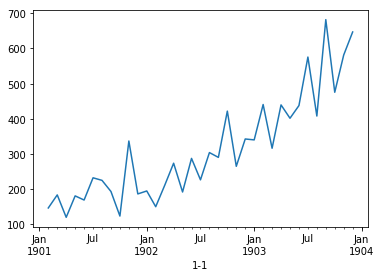

In [22]:
### ARIMA Model - Time Series prediction 
## AR - Autoregression, I - Integrated, MA - Moving Average
from pandas import datetime
from matplotlib import pyplot
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import autocorrelation_plot
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('/Users/kamalesh_das/Desktop/Python/data/sales-of-shampoo-over-a-three_Years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head(30))
series.plot()
pyplot.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


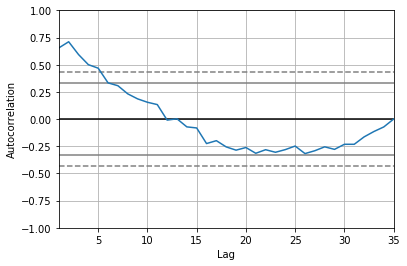

In [23]:
### Autocorrelation plot of the time series
autocorrelation_plot(series)
pyplot.show()

In [ ]:
# Here is a positive correlation with the first 10-to-12 lags 
## that is perhaps significant for the first 5 lags.
## A good starting point for the AR parameter of the model may be 5.
## we fit an ARIMA(5,1,0) model based on ARIMA(p,d,q). This sets the lag value to 5 for autoregression
## p: The number of lag observations included in the model, also called the lag order.
## d: The number of times that the raw observations are differenced, also called the degree of differencing.
## q: The size of the moving average window, also called the order of moving average.

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:                  D.266   No. Observations:                   34
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -188.279
Method:                       css-mle   S.D. of innovations             59.834
Date:                Thu, 01 Nov 2018   AIC                            390.559
Time:                        22:05:32   BIC                            401.243
Sample:                    03-01-1901   HQIC                           394.203
                         - 12-01-1903                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.5140      3.340      4.046      0.000       6.968      20.060
ar.L1.D.266    -1.1471      0.171     -6.709      0.000      -1.482      -0.812
ar.L2.D.266    -0.6961      0.265     -2.626    

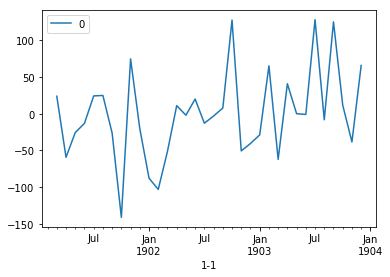

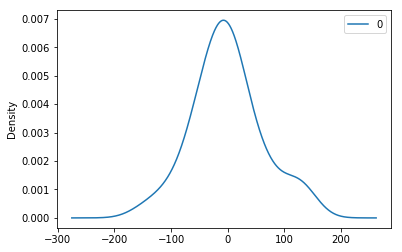

                0
count   34.000000
mean    -0.864527
std     61.112749
min   -141.014123
25%    -36.113645
50%     -2.684341
75%     24.004720
max    127.834601


In [24]:
## Fitting the ARIMA model
## Passing disp argument to 0 to avoid lot of debug informations during model fitting

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [25]:
## First graph is showing a line plot of the residual errors, 
## suggesting that there may still be some trend information not captured by the model.

## Second graph is showing a density plot of the residual error values, 
## suggesting the errors are Gaussian, but may not be centered on zero.

In [26]:
## There is some bias in the prediction as mean is -0.864527
#count   34.000000
#mean    -0.864527
#std     61.112749
#min   -141.014123
#25%    -36.113645
#50%     -2.684341
#75%     24.004720
#max    127.834601

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=326.860835, expected=339.700000
predicted=391.723467, expected=440.400000
predicted=353.007307, expected=315.900000
predicted=385.696635, expected=439.300000
predicted=367.847646, expected=401.300000
predicted=448.605024, expected=437.400000
predicted=401.918029, expected=575.500000
predicted=429.887201, expected=407.600000
predicted=514.778076, expected=682.000000
predicted=442.026656, expected=475.300000
predicted=651.955296, expected=581.300000
predicted=561.306338, expected=646.900000
---------------------------------------
Test MSE: 6670.441


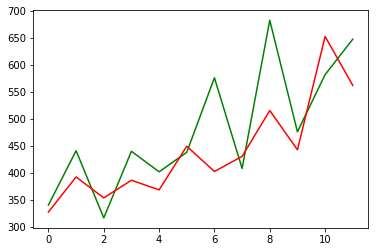

In [29]:
## Making forecast using ARIMA model and calculating MSE
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('---------------------------------------')
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test,color='green')
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
## The above plot is showing expected values(Green) compared to rolling forecast predictions(red)